## Overview

Take the 4 popuation model that was inferred previously and add the fith population for Mexican Admixture.

In [1]:
import moments
import demes
import demesdraw
import matplotlib.pyplot as plt
import pickle
import gzip
from IPython.display import Markdown as md
import warnings

# Function for printing syntax-highlighted YAML demes models
# If there is a better way to do this, tell me!!
def print_model(file_path):
    with open(file_path) as f:
        lines = f.read()
    return md("```yaml\n" + lines + "```")
warnings.filterwarnings('ignore')

## Inferred 4 populations model

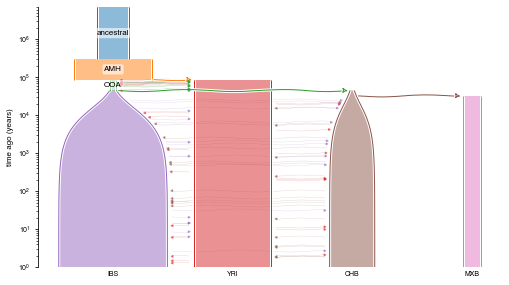

In [2]:
## 4 pops model

# this file contains the parametrization of the model
ooa4_yml = "../210930-PeoplingAmerica/results/ooa-4pops-fitted.yml"
ooa4 = demes.load(ooa4_yml)
demesdraw.tubes(ooa4, log_time=True)
plt.show();

In [3]:
print_model(ooa4_yml)

```yaml
description: The Gutenkunst et al. (2009) three-population model of human history,
  modified by replacing CEU with IBS.
time_units: years
generation_time: 29
doi: ['https://doi.org/10.1371/journal.pgen.1000695']
demes:
- name: ancestral
  description: Equilibrium/root population
  epochs:
  - {end_time: 300983.61910865706, start_size: 9593.315822139859}
- name: AMH
  description: Anatomically modern humans
  ancestors: [ancestral]
  epochs:
  - {end_time: 86978.93529450893, start_size: 23512.69146204261}
- name: OOA
  description: Bottleneck out-of-Africa population
  ancestors: [AMH]
  epochs:
  - {end_time: 44748.23862033427, start_size: 2056.5730700064346}
- name: YRI
  description: Yoruba in Ibadan, Nigeria
  ancestors: [AMH]
  epochs:
  - {end_time: 0, start_size: 23512.69146204261}
- name: IBS
  description: Iberian populations in Spain (IBS).
  ancestors: [OOA]
  epochs:
  - {end_time: 0, start_size: 2130.4390581666967, end_size: 32956.374504334126}
- name: CHB
  description: Han Chinese in Beijing, China
  ancestors: [OOA]
  epochs:
  - {end_time: 0, start_size: 1338.9282421410517, end_size: 13677.905103953248}
- name: MXB
  description: Native American,  Mexico.
  start_time: 32384.645992816106
  ancestors: [CHB]
  epochs:
  - {end_time: 0, start_size: 5518.502179103086}
migrations:
- demes: [YRI, IBS]
  rate: 3.256463068676266e-05
- demes: [YRI, CHB]
  rate: 1.6414195981495537e-05
- demes: [IBS, CHB]
  rate: 7.69081279717762e-05
- {source: YRI, dest: OOA, rate: 9.885227357176779e-05}
- {source: OOA, dest: YRI, end_time: 44748.23862033427, rate: 9.885227357176779e-05}
```

## Five populations model

In [4]:
print_model('./ooa-5pops-mxadmix.yml')

```yaml
description: The Gutenkunst et al. (2009) three-population model of human history,
  modified by replacing CEU with IBS.
time_units: years
generation_time: 29
doi: ['https://doi.org/10.1371/journal.pgen.1000695']
demes:
- name: ancestral
  description: Equilibrium/root population
  epochs:
  - {end_time: 300983.61910865706, start_size: 9593.315822139859}
- name: AMH
  description: Anatomically modern humans
  ancestors: [ancestral]
  epochs:
  - {end_time: 86978.93529450893, start_size: 23512.69146204261}
- name: OOA
  description: Bottleneck out-of-Africa population
  ancestors: [AMH]
  epochs:
  - {end_time: 44748.23862033427, start_size: 2056.5730700064346}
- name: YRI
  description: Yoruba in Ibadan, Nigeria
  ancestors: [AMH]
  epochs:
  - {end_time: 0, start_size: 23512.69146204261}
- name: IBS
  description: Iberian populations in Spain (IBS).
  ancestors: [OOA]
  epochs:
  - {end_time: 0, start_size: 2130.4390581666967, end_size: 32956.374504334126}
- name: CHB
  description: Han Chinese in Beijing, China
  ancestors: [OOA]
  epochs:
  - {end_time: 0, start_size: 1338.9282421410517, end_size: 13677.905103953248}
- name: MXB
  description: Native American,  Mexico.
  start_time: 32384.645992816106
  ancestors: [CHB]
  epochs:
  - {end_time: 0, start_size: 5518.502179103086}
- name: MXL
  description: Admixed population in Mexico
  ancestors: [IBS, MXB]
  proportions: [0.4908, 0.5092]  # Obtained from Tracts
  start_time: 435
  epochs:
  - {end_time: 0, start_size: 20000}
migrations: 
- demes: [YRI, IBS]
  rate: 3.256463068676266e-05
- demes: [YRI, CHB]
  rate: 1.6414195981495537e-05
- demes: [IBS, CHB]
  rate: 7.69081279717762e-05
- {source: YRI, dest: OOA, rate: 9.885227357176779e-05}
- {source: OOA, dest: YRI, end_time: 44748.23862033427, rate: 9.885227357176779e-05}
- {source: IBS, dest: MXL, rate: 0.053}
- {source: MXB, dest: MXL, rate: 0.055}
pulses:
- source: YRI
  dest: MXL
  proportion: 0.0913
  time: 319
```

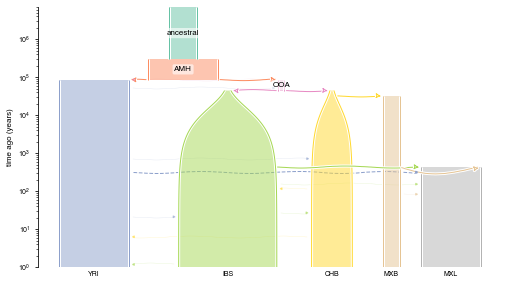

In [11]:
## 4 pops model

# this file contains the parametrization of the model
ooa5_yml = "ooa-5pops-mxadmix.yml"

positions = {
    'ancestral': 30000,
    'AMH': 30000,
    'YRI': 0,
    'OOA': 63000,
    'IBS': 45000,
    'CHB': 80000,
    'MXB': 100000,
    'MXL': 120000
    
}

colors = {
    'ancestral': '#66c2a5',
    'AMH': '#fc8d62',
    'YRI': '#8da0cb',
    'OOA': '#e78ac3',
    'IBS': '#a6d854',
    'CHB': '#ffd92f',
    'MXB': '#e5c494',
    'MXL': '#b3b3b3'
}

ooa5 = demes.load(ooa5_yml)
demesdraw.tubes(
    ooa5,
    log_time=True,
    num_lines_per_migration=1,
    optimisation_rounds=20,
    colours=colors,
    positions=positions)

plt.savefig('five-pops.pdf')
plt.show();

In [12]:
demesdraw.utils.size_min(ooa5)

1338.9282421410517

For the MXL population we would like to infer the effective population size.

In [13]:
print_model("./ooa-5pops-options.yml")

```yaml
# Parametrization for OOA model with Native American expansion
# and Mexican admixture
parameters:
- name: Nmxl
  description: Effective population size for MXL
  upper_bound: 100000
  lower_bound: 5000
  values:
  - demes:
      MXL:
        epochs:
          0: start_size
```

## Inferred parameters